In [13]:
import os
import glob 

files = glob.glob('*.DTA')
files


['3 CV 300_M1_S2_test2_cdl.DTA',
 '4 CV 250_M1_S2_test2_cdl.DTA',
 '5 CV 200_M1_S2_test2_cdl.DTA',
 '6 CV 150_M1_S2_test2_cdl.DTA',
 '7 CV 100_M1_S2_test2_cdl.DTA',
 '8 CV 50_M1_S2_test2_cdl.DTA']

In [14]:
ch = 0

filename = files[ch]
filename

'3 CV 300_M1_S2_test2_cdl.DTA'

In [15]:
import numpy as np  # For creating arrays (optional)
import pandas as pd


# File path (replace with your actual file path)

# Define the line number to start reading (skip header lines)
start_line = 65  # For example, skip the first 5 lines (adjust as needed)

# Initialize variables to store curves
curves = []
current_curve = []

# Open and read the file
with open(filename, "r") as file:
    # Skip lines until the start_line
    for i, line in enumerate(file):
        if i < start_line:
            continue  # Skip header lines
        
        line = line.strip()  # Remove leading/trailing spaces
        
        # If the line starts with "CURVE", we've reached a new curve
        if line.startswith("CURVE"):
            # If there's an existing curve, add it to the list (as a numpy array)
            if current_curve:
                # Process each line of the curve before adding it to the curves list
                processed_curve = []
                for curve_data in current_curve:
                    # Replace commas with periods
                    curve_data = curve_data.replace(',', '.')
                    # Split by tab (\t)
                    processed_curve.append(curve_data.split('\t'))
                
                # Append the processed curve to curves
                curves.append(np.array(processed_curve))  # Convert to array (optional)
                current_curve = []  # Reset for the next curve

        
        # Skip lines with "\tPt" (data header)
        elif line.startswith("Pt"):
            pass

            # Skip lines with "\t#" (unit header)
        elif line.startswith("#"):
            pass   

        else:
            # Add the line to the current curve if it's part of the curve data
            current_curve.append(line)
    

    # Add the last curve to the list (if exists)
    if current_curve:
        processed_curve = []
        for curve_data in current_curve:
            # Replace commas with periods
            curve_data = curve_data.replace(',', '.')
            # Split by tab (\t)
            processed_curve.append(curve_data.split('\t'))
        
        # Append the processed curve to curves
        curves.append(np.array(processed_curve, dtype=object))  # Convert to array


Convert the curve in the curves list into a dataframes. Splitting each curve into a dataframe

In [16]:
import pandas as pd

# Assuming 'curves' is a list of curves (each curve is a list of lists or a numpy array)
curve_dfs = {}  # Dictionary to store each curve as a separate DataFrame

for i, curve in enumerate(curves, 1):
    print(f"Curve {i}:")
    print(curve)  # This will print each curve's data as it's processed
    
    # Convert the curve into a DataFrame
    aux = pd.DataFrame(curve)
    
    # If you want to set meaningful column names, you can do so here
    # Replace this with appropriate names based on your data
    column_names = [f'Column_{j+1}' for j in range(aux.shape[1])]  # Creates a list of column names
    aux.columns = column_names
    
    # Store the DataFrame in the dictionary using a unique key for each curve
    curve_dfs[f'Curve_{i}'] = aux

# Now each curve is stored as a separate DataFrame in the 'curve_dfs' dictionary
# You can access them like this:
# curve_dfs['Curve_1'], curve_dfs['Curve_2'], ...

# Example: Print the first few rows of each curve DataFrame
for curve_name, curve_df in curve_dfs.items():
    print(f"\n{curve_name}:")
    print(curve_df.head())  # Display the first 5 rows of each curve

Curve 1:
[['0' '0.006667' '-7.64853E-005' ... '9' '...........' '1359.17']
 ['1' '0.013333' '1.92204E-003' ... '9' '...........' '1359.17']
 ['2' '0.02' '3.92206E-003' ... '9' '...........' '1359.17']
 ...
 ['144' '0.96667' '9.99128E-002' ... '9' '...........' '1359.17']
 ['145' '0.97333' '9.79121E-002' ... '9' '...........' '1359.17']
 ['146' '0.98' '9.59121E-002' ... '9' '...........' '1359.17']]
Curve 2:
[['147' '0.98667' '9.39197E-002' '-2.10196E-004' '0.00000E+000'
  '9.39966E-002' '0.00000E+000' '9' '...........' '1359.17']
 ['148' '0.99333' '9.19159E-002' '-2.12466E-004' '0.00000E+000'
  '9.19976E-002' '0.00000E+000' '9' '...........' '1359.17']
 ['149' '1' '8.99174E-002' '-2.15543E-004' '0.00000E+000' '8.99986E-002'
  '0.00000E+000' '9' '...........' '1359.17']
 ['150' '1.00667' '8.79145E-002' '-2.17899E-004' '0.00000E+000'
  '8.79996E-002' '0.00000E+000' '9' '...........' '1359.17']
 ['151' '1.01333' '8.59178E-002' '-2.20904E-004' '0.00000E+000'
  '8.60006E-002' '0.00000E+000'

In [17]:
# Iterate over each curve DataFrame in the dictionary and select columns 2, 3, and 4
selected_columns = {}

for curve_name, curve_df in curve_dfs.items():
    # Select columns 2, 3, and 4 (which are indices 1, 2, and 3)
    selected = curve_df.iloc[:, [1, 2, 3]]
    
    # Assign the new column names: "Time", "Vf", "A"
    selected.columns = ['Time', 'Vf', 'A']
    
    # Convert the selected columns to float
    selected = selected.astype(float)
    
    # Store the selected columns with new names and float type in the dictionary
    selected_columns[curve_name] = selected

    # Optionally, print the first 5 rows of selected columns to verify the conversion
    # print(f"\nSelected and converted columns for {curve_name}:")
    # print(selected_columns[curve_name].head())  # Print the first 5 rows of selected columns

# Now, selected_columns dictionary contains the selected columns with the new names and float type for each curve
# Access them like this: selected_columns['Curve_1'], selected_columns['Curve_2'], ...

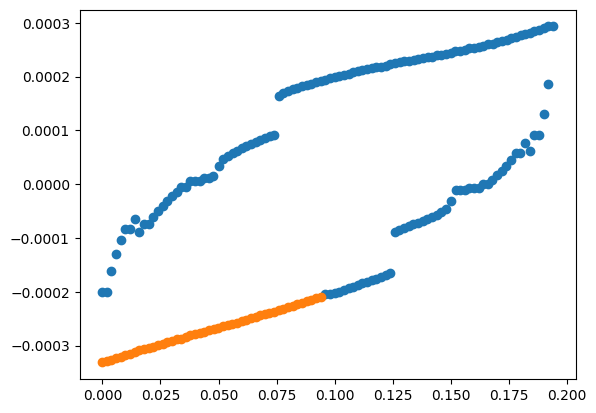

In [25]:
from scipy import signal
import matplotlib.pyplot as plt

plt.plot(selected_columns['Curve_1']['Vf'],signal.medfilt(selected_columns['Curve_1']['A'],3),'o')
plt.plot(selected_columns['Curve_2']['Vf'],selected_columns['Curve_2']['A'],'o')

In [19]:
# Specify the filename where the Excel file will be saved
name = filename + "_suavebiensuave.xlsx"

# Use ExcelWriter to write multiple DataFrames into one Excel file
with pd.ExcelWriter(name) as writer:
    for curve_name, df in selected_columns.items():
        # Write each DataFrame into a separate sheet
        df.to_excel(writer, sheet_name=curve_name, index=False)

print(f"DataFrames saved to {name}")


DataFrames saved to 3 CV 300_M1_S2_test2_cdl.DTA_suavebiensuave.xlsx
